In [70]:
%load_ext autoreload
%autoreload 2
%aimport -numpy, -matplotlib, -IPython
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
import l2a_analysis as l2aa
from helpers import get_stats_average, plot_true_color_image, plot_difference_histogram, multiplot_difference_histogram



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
locs = {
    "CH": "S2A_MSIL1C_20230903T101601_N0509_R065_T32TMS_20230903T140124.SAFE",
    "BRA": "S2A_MSIL1C_20230909T141721_N0509_R010_T21MTS_20230909T192148.SAFE",
    'ALG' : 'S2B_MSIL1C_20230904T103629_N0509_R008_T30RXT_20230904T125735.SAFE'
}

# NO_DATA, SATURATED_OR_DEFECTIVE, CASTED_SHADOWS, CLOUD_SHADOWS, VEGETATION, NOT_VEGETATED, WATER, UNCLASSIFIED, CLOUD_MEDIUM_PROBABILITY, CLOUD_HIGH_PROBABILITY, THIN_CIRRUS, SNOW
modifications = [
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '0',
        'info' : 'Set whole SCL layer to NO_DATA, same as L1C',
        'name' : 'class_NO_DATA'
    },
    {
        'flag' : 'SEN2COR_MODIFY_LUT_AEROSOL',
        'value' : 'MARITIME',
        'info' : 'Look Up Table Aerosol set to MARITIME',
        'name' : 'LUT_AEROSOL_MARITIME'
    },
    {
        "flag": "SEN2COR_MODIFY_LUT_SEASON",
        "value": "WINTER",
        "info": "Look Up Table Mid Latitude Season set to WINTER",
        "name": "LUT_SEASON_WINTER",
    },
    {
        "flag": "SEN2COR_MODIFY_LUT_OZONE",
        "value": "250",
        "info": "Look Up Table Ozone set to 250",
        "name": "LUT_OZONE_250",
    },
    {
        "flag": "SEN2COR_MODIFY_LUT_OZONE",
        "value": "450",
        "info": "Look Up Table Ozone set to 450",
        "name": "LUT_OZONE_450",
    },
    {
        "flag": "SEN2COR_MODIFY_FLAGS_WV",
        "value": "0",
        "info": "Turn off water vapour correction",
        "name": "FLAG_WV_OFF",
    },
    {
        "flag": "SEN2COR_MODIFY_FLAGS_CIRRUS",
        "value": "FALSE",
        "info": "Turn off cirrus correction",
        "name": "FLAG_CIRRUS_OFF",
    },
    {
        "flag": "SEN2COR_MODIFY_FLAGS_BRDF",
        "value": "1",
        "info": "Set BRDF correction to 1",
        "name": "FLAG_BRDF_1",
    },
    {
        "flag": "SEN2COR_MODIFY_FLAGS_BRDF",
        "value": "2",
        "info": "Set BRDF correction to 2",
        "name": "FLAG_BRDF_2",
    },
    {
        "flag": "SEN2COR_MODIFY_CALIB_VISIBILITY",
        "value": "20",
        "info": "Set visibility to 20km",
        "name": "CALIB_VISIBILITY_20",
    },
    {
        "flag": "SEN2COR_MODIFY_CALIB_VISIBILITY",
        "value": "80",
        "info": "Set visibility to 80km",
        "name": "CALIB_VISIBILITY_80",
    },
    {
        "flag": "SEN2COR_MODIFY_CALIB_VISIBILITY",
        "value": "120",
        "info": "Set visibility to 120km",
        "name": "CALIB_VISIBILITY_120",
    },
]

SC_const_labels = [
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '0',
        'info' : 'Set whole SCL layer to NO_DATA',
        'name' : 'class_NO_DATA'
    },
    # {
    #     'flag' : 'SEN2COR_MOD_const_class',
    #     'value' : '1',
    #     'info' : 'Set whole SCL layer to SATURATED_OR_DEFECTIVE',
    #     'name' : 'class_SATURATED_OR_DEFECTIVE'
    # },
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '2',
        'info' : 'Set whole SCL layer to CASTED_SHADOWS',
        'name' : 'class_CASTED_SHADOWS'
    },
    {
        "flag": "SEN2COR_MOD_const_class",
        "value": "3",
        "info": "Set whole SCL layer to CLOUD_SHADOWS",
        "name": "class_CLOUD_SHADOWS",
    },
    {
        "flag": "SEN2COR_MOD_const_class",
        "value": "4",
        "info": "Set whole SCL layer to VEGETATION",
        "name": "class_VEGETATION",
    },
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '5',
        'info' : 'Set whole SCL layer to NOT_VEGETATED',
        'name' : 'class_NOT_VEGETATED'
    },
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '6',
        'info' : 'Set whole SCL layer to WATER',
        'name' : 'class_WATER'
    },
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '7',
        'info' : 'Set whole SCL layer to UNCLASSIFIED',
        'name' : 'class_UNCLASSIFIED'
    },
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '8',
        'info' : 'Set whole SCL layer to CLOUD_MEDIUM_PROBABILITY',
        'name' : 'class_CLOUD_MEDIUM_PROBABILITY'
    },
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '9',
        'info' : 'Set whole SCL layer to CLOUD_HIGH_PROBABILITY',
        'name' : 'class_CLOUD_HIGH_PROBABILITY'
    },
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '10',
        'info' : 'Set whole SCL layer to THIN_CIRRUS',
        'name' : 'class_THIN_CIRRUS'
    },
    {
        'flag' : 'SEN2COR_MOD_const_class',
        'value' : '11',
        'info' : 'Set whole SCL layer to SNOW',
        'name' : 'class_SNOW'
    },

]

In [72]:
l2a_analysis = l2aa.L2A_Analysis(report_name="TEST")
l2a_analysis.set_locations(locs)
l2a_analysis.set_modifications(modifications)

In [73]:
l2a_analysis.run_sen2cor()
l2a_analysis.read_l2a_data()

CH:	reference already exists. Skipping...
BRA:	reference already exists. Skipping...
ALG:	reference already exists. Skipping...
Running sen2cor for CH: class_NO_DATA
Running command:  /scratch/toml/Sen2Cor-02.11.00-Linux64/bin/L2A_Process /scratch/toml/sentinel_2_data/locations/CH/S2A_MSIL1C_20230903T101601_N0509_R065_T32TMS_20230903T140124.SAFE --resolution 60 --GIP_L2A /home/toml/sen2cor/2.11/cfg/L2A_GIPP_custom.xml --output_dir /scratch/toml/sentinel_2_data/reports/TEST/CH/class_NO_DATA
Product versions > 14.9 are not implemented yet.
Version 14.9 will be used by default, but warnings during validation might occur.

Cloud heights processed in 0:00:03.777767 seconds
running old post processing
Running modify_SCL in postprocessing step
	Setting constant class: 0
Finished modify_SCL
Progress[%]: 100.00 : Application terminated successfully.

Running sen2cor for BRA: class_NO_DATA
Running command:  /scratch/toml/Sen2Cor-02.11.00-Linux64/bin/L2A_Process /scratch/toml/sentinel_2_data/loca

In [74]:
loc = 'CH'
mod = 'LUT_SEASON_WINTER'
stat_bands = ["B02", "B03", "B04", "B05", "B06", "B07", "B8A", "B11", "B12"]
stats = get_stats_average(l2a_analysis.reference_bands[loc], l2a_analysis.modified_bands[loc][mod], stat_bands)
display(stats)


mean      9.221410
std      16.528713
max     223.888885
min     -46.666668
dtype: float32

In [75]:
l2a_analysis.get_modification_names()

['class_NO_DATA',
 'LUT_AEROSOL_MARITIME',
 'LUT_SEASON_WINTER',
 'LUT_OZONE_250',
 'LUT_OZONE_450',
 'FLAG_WV_OFF',
 'FLAG_CIRRUS_OFF',
 'FLAG_BRDF_1',
 'FLAG_BRDF_2',
 'CALIB_VISIBILITY_20',
 'CALIB_VISIBILITY_80',
 'CALIB_VISIBILITY_120']

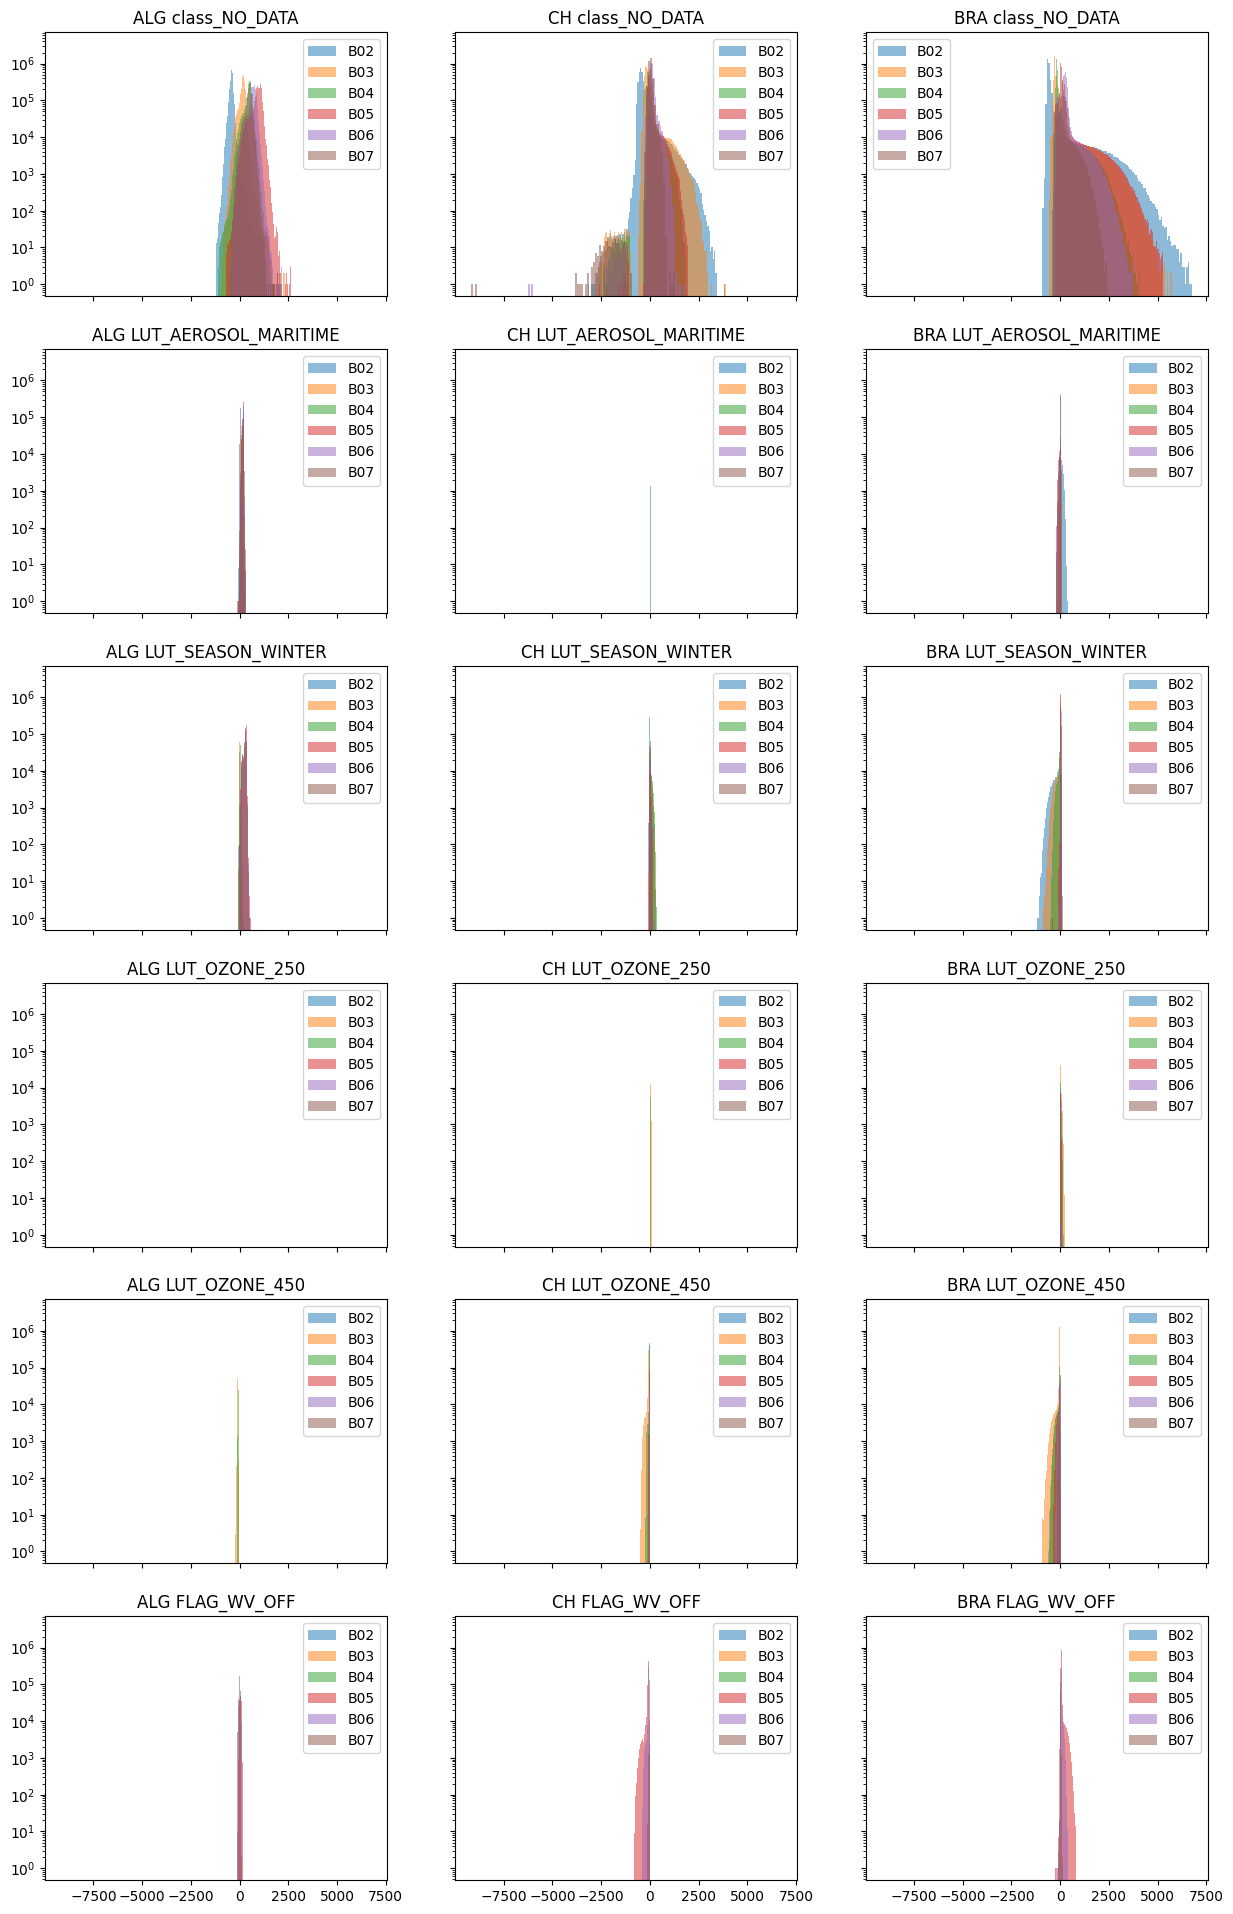

In [97]:
locs = ["ALG", "CH", "BRA"]
# bands = ["B02", "B03", "B04", "B05", "B06", "B07", "B8A", "B11", "B12"]
bands = ["B02", "B03", "B04", "B05", "B06", "B07"]
# mods = ['SC_ONLY', 'class_NO_DATA']
mods = [
    "class_NO_DATA",
    "LUT_AEROSOL_MARITIME",
    "LUT_SEASON_WINTER",
    "LUT_OZONE_250",
    "LUT_OZONE_450",
    "FLAG_WV_OFF",
    # "FLAG_CIRRUS_OFF",
    # "FLAG_BRDF_1",
    # "FLAG_BRDF_2",
    # "CALIB_VISIBILITY_20",
    # "CALIB_VISIBILITY_80",
    # "CALIB_VISIBILITY_120",
]
multiplot_difference_histogram(l2a_analysis, locs, mods, bands, share_axes=False)

In [77]:
from helpers import get_stats_average_multi
locs = ['ALG', 'CH', 'BRA']
# mods = ['class_NO_DATA',  'class_CLOUD_SHADOWS', 'class_VEGETATION', 'class_SNOW']
bands = ['B02', 'B03', 'B04']
# stats = get_stats_average_multi(l2a_analysis, locs, mods, bands)
# print("Standard Deviation")
# display(stats['std'])
# print("Mean")
# display(stats['mean'])
# print("Max")
# display(stats['max'])
# print("Min")
# display(stats['min'])


Standard Deviation


,LUT_AEROSOL_MARITIME,LUT_SEASON_WINTER,LUT_OZONE_250,LUT_OZONE_450,FLAG_WV_OFF,FLAG_CIRRUS_OFF,FLAG_BRDF_1,FLAG_BRDF_2,CALIB_VISIBILITY_20,CALIB_VISIBILITY_80,CALIB_VISIBILITY_120
ALG,25.411276,10.694032,2.504062,9.896968,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CH,2.933413,28.041716,6.621998,26.841669,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BRA,17.978306,72.878212,16.514950,59.915653,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Mean


,LUT_AEROSOL_MARITIME,LUT_SEASON_WINTER,LUT_OZONE_250,LUT_OZONE_450,FLAG_WV_OFF,FLAG_CIRRUS_OFF,FLAG_BRDF_1,FLAG_BRDF_2,CALIB_VISIBILITY_20,CALIB_VISIBILITY_80,CALIB_VISIBILITY_120
ALG,99.987305,21.759542,17.666555,-71.569481,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CH,1.125413,11.472911,9.415896,-38.268974,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BRA,3.765205,5.025428,7.211563,-28.901911,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Max


,LUT_AEROSOL_MARITIME,LUT_SEASON_WINTER,LUT_OZONE_250,LUT_OZONE_450,FLAG_WV_OFF,FLAG_CIRRUS_OFF,FLAG_BRDF_1,FLAG_BRDF_2,CALIB_VISIBILITY_20,CALIB_VISIBILITY_80,CALIB_VISIBILITY_120
ALG,249.666672,169.333328,35.333332,-26.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CH,45.666668,362.333344,80.333336,8.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BRA,170.666672,72.000000,201.333328,20.666666,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Min


,LUT_AEROSOL_MARITIME,LUT_SEASON_WINTER,LUT_OZONE_250,LUT_OZONE_450,FLAG_WV_OFF,FLAG_CIRRUS_OFF,FLAG_BRDF_1,FLAG_BRDF_2,CALIB_VISIBILITY_20,CALIB_VISIBILITY_80,CALIB_VISIBILITY_120
ALG,-12.666667,-64.666664,6.000000,-141.666672,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CH,-25.666666,-78.000000,-2.333333,-326.333344,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BRA,-61.333332,-850.333313,-8.666667,-731.666687,0.0,0.0,0.0,0.0,0.0,0.0,0.0


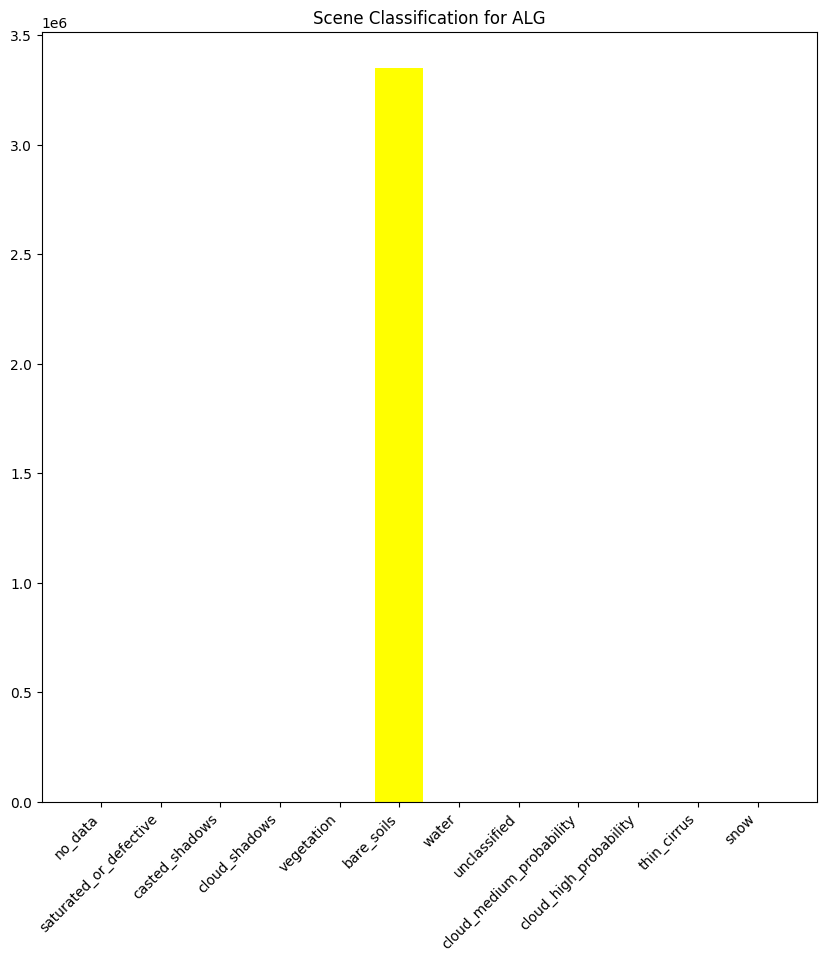

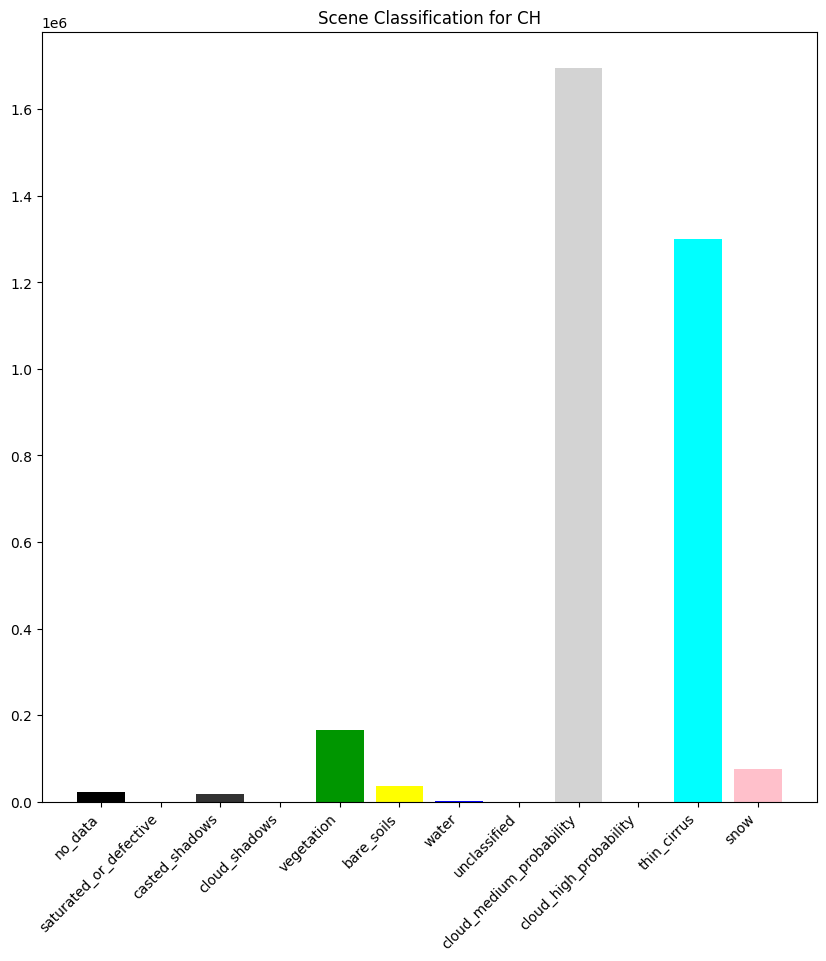

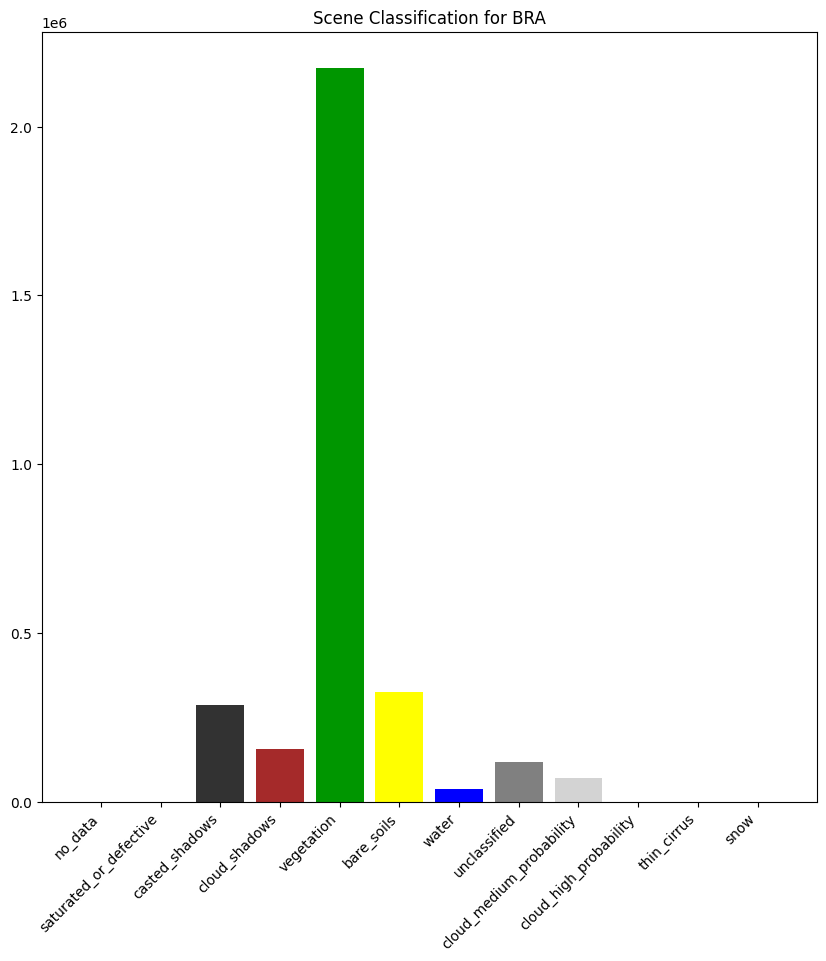

In [78]:
from helpers import plot_scl_in_rgb, plot_scl_as_bar_chart
for loc in locs:
    SCL = l2a_analysis.reference_bands[loc]['SCL']
    # plot_true_color_image(l2a_analysis.reference_bands[loc], gamma=3, title=f"TCI {loc}: Gamma = 3", clip_value=10000)
    # plot_scl_in_rgb(SCL, title=loc)
    plot_scl_as_bar_chart(l2a_analysis.reference_bands[loc], title=loc)


In [79]:
import numpy as np
clip_value = 10000

product = l2a_analysis.reference_bands[loc]

blue = product["B02"].read() 
green = product["B03"].read() 
red = product["B04"].read() 
green[0,2] = 20000
rgb = np.dstack((red, green, blue))
rgb = rgb[0:10, 0:10, :]
rgb[0,0,0] = 20000
# clip values
mask = [rgb > clip_value]

In [80]:
product = l2a_analysis.reference_bands[loc]
#pretty print
from pprint import pprint
pprint(product["B02"].meta)



{'count': 1,
 'crs': CRS.from_epsg(32721),
 'driver': 'JP2OpenJPEG',
 'dtype': 'uint16',
 'height': 1830,
 'nodata': None,
 'transform': Affine(60.0, 0.0, 199980.0,
       0.0, -60.0, 9700000.0),
 'width': 1830}


In [81]:
from helpers import get_max_difference_to_l2a
loc = 'CH'
bands = ['B02', 'B03', 'B04']
max_diffs, max_ids = get_max_difference_to_l2a(l2a_analysis, loc, mods, bands)

In [82]:
meta = l2a_analysis.reference_bands[loc]["B02"].meta

# total_diff = np.zeros((meta["height"], meta["width"]))
# for diff in max_diffs:
#     total_diff = np.maximum(total_diff, max_diffs[diff])

# with rio.open("outputs/total_diff_BRA.jp2", "w", **meta) as dst:
#     dst.write(total_diff, 1)


# for diff in max_diffs:
#     with rio.open(f"outputs/diff_{diff}.jp2", "w", **meta) as dst:
#         dst.write(max_diffs[diff], 1)

# for idx in max_ids:
#     with rio.open(f"outputs/id_{idx}.jp2", "w", **meta) as dst:
#         dst.write(max_ids[idx], 1)
# meta["count"] = len(max_diffs)
# with rio.open("outputs/difference.jp2", "w", **product["B02"].meta) as dst:
#     for i, diff in enumerate(max_diffs):
#         dst.write(max_diffs[diff], i+1)

from helpers import export_to_jp2

export_to_jp2(max_diffs, ["B02", "B03", "B04"], "outputs/difference_CH.jp2", meta)


In [145]:
from helpers import get_comparison_matrices
loc = 'BRA'
mods = [
    "FLAG_CIRRUS_OFF",
    # "class_NO_DATA",
    "LUT_AEROSOL_MARITIME",
    "LUT_SEASON_WINTER",
    "LUT_OZONE_250",
    "LUT_OZONE_450",
    "FLAG_WV_OFF",

]
bands = ["B02", "B03", "B04"]
comp_matrix = get_comparison_matrices(l2a_analysis, loc, mods, bands)

In [ ]:
comp_matrix

mean                                         \
                     FLAG_CIRRUS_OFF LUT_AEROSOL_MARITIME LUT_SEASON_WINTER   
FLAG_CIRRUS_OFF             0.000000             1.125413         11.472911   
LUT_AEROSOL_MARITIME       -1.125413             0.000000         10.347497   
LUT_SEASON_WINTER         -11.472911           -10.347497          0.000000   
LUT_OZONE_450              38.268974            39.394398         49.741867   
FLAG_WV_OFF                 0.000000             1.125413         11.472911   

                                                           std  \
                     LUT_OZONE_450 FLAG_WV_OFF FLAG_CIRRUS_OFF   
FLAG_CIRRUS_OFF         -38.268974    0.000000        0.000000   
LUT_AEROSOL_MARITIME    -39.394398   -1.125413        2.933413   
LUT_SEASON_WINTER       -49.741867  -11.472911       28.041716   
LUT_OZONE_450             0.000000   38.268974       26.841669   
FLAG_WV_OFF             -38.268974    0.000000        0.000000   

                                                                           \
                     LUT_AEROSOL_MARITIME LUT_SEASON_WINTER LUT_OZONE_450   
FLAG_CIRRUS_OFF                  2.933413         28.041716     26.841669   
LUT_AEROSOL_MARITIME             0.000000         26.362860     28.873566   
LUT_SEASON_WINTER               26.362860          0.000000     54.365406   
LUT_OZONE_450                   28.873566         54.365406      0.000000   
FLAG_WV_OFF                      2.933413         28.041716     26.841669   

                                             max                       \
                     FLAG_WV_OFF FLAG_CIRRUS_OFF LUT_AEROSOL_MARITIME   
FLAG_CIRRUS_OFF         0.000000        0.000000            45.666668   
LUT_AEROSOL_MARITIME    2.933413       25.666666             0.000000   
LUT_SEASON_WINTER      28.041716       78.000000            86.666664   
LUT_OZONE_450          26.841669      326.333344           364.666656   
FLAG_WV_OFF             0.000000        0.000000            45.666668   

                                                                  \
                     LUT_SEASON_WINTER LUT_OZONE_450 FLAG_WV_OFF   
FLAG_CIRRUS_OFF             362.333344      8.666667    0.000000   
LUT_AEROSOL_MARITIME        337.666656     30.333334   25.666666   
LUT_SEASON_WINTER             0.000000     54.000000   78.000000   
LUT_OZONE_450               685.666687      0.000000  326.333344   
FLAG_WV_OFF                 362.333344      8.666667    0.000000   

                                 min                                         \
                     FLAG_CIRRUS_OFF LUT_AEROSOL_MARITIME LUT_SEASON_WINTER   
FLAG_CIRRUS_OFF             0.000000           -25.666666        -78.000000   
LUT_AEROSOL_MARITIME      -45.666668             0.000000        -86.666664   
LUT_SEASON_WINTER        -362.333344          -337.666656          0.000000   
LUT_OZONE_450              -8.666667           -30.333334        -54.000000   
FLAG_WV_OFF                 0.000000           -25.666666        -78.000000   

                                                
                     LUT_OZONE_450 FLAG_WV_OFF  
FLAG_CIRRUS_OFF        -326.333344    0.000000  
LUT_AEROSOL_MARITIME   -364.666656  -45.666668  
LUT_SEASON_WINTER      -685.666687 -362.333344  
LUT_OZONE_450             0.000000   -8.666667  
FLAG_WV_OFF            -326.333344    0.000000

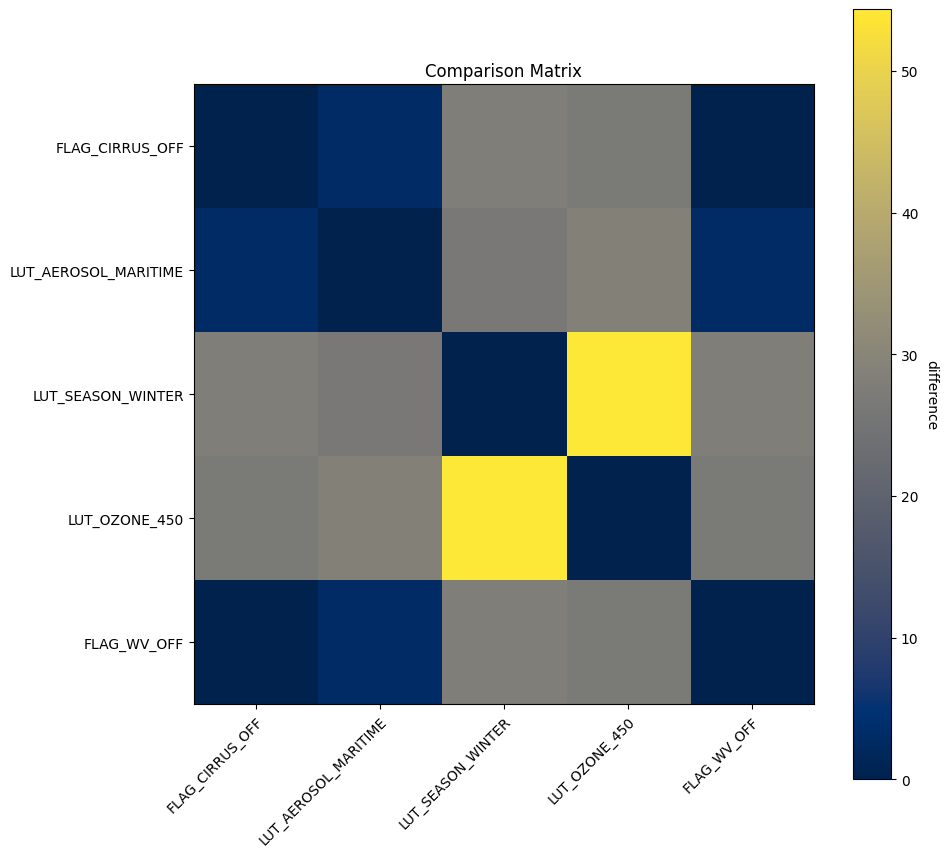

In [ ]:
from helpers import plot_comparison_matrix
plot_comparison_matrix(comp_matrix["std"])


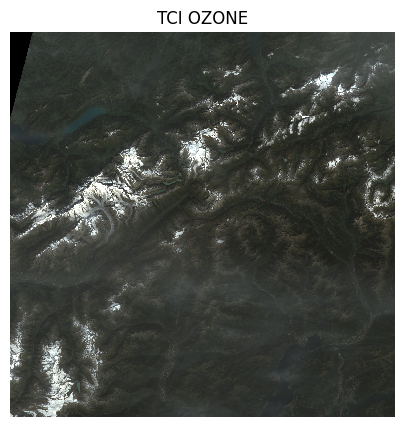

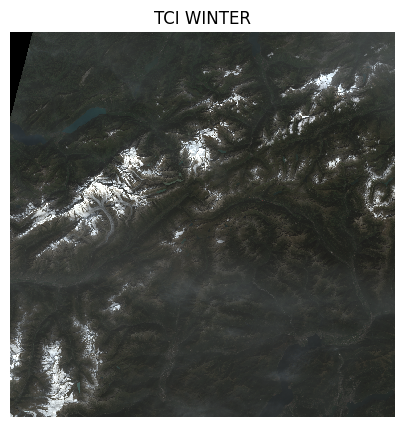

In [ ]:
plot_true_color_image(l2a_analysis.modified_bands[loc]["LUT_OZONE_450"], gamma=3, title=f"TCI OZONE", clip_value=10000)
plot_true_color_image(l2a_analysis.modified_bands[loc]["LUT_SEASON_WINTER"], gamma=3, title=f"TCI WINTER", clip_value=10000)


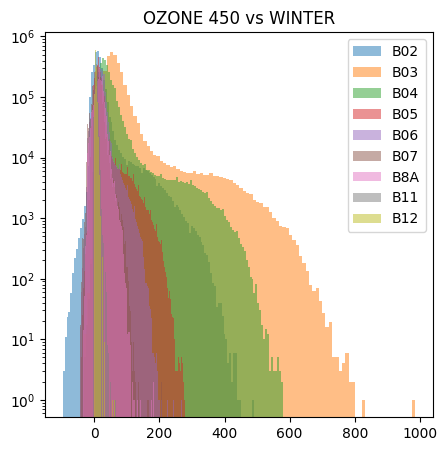

In [ ]:
bands = ["B02", "B03", "B04", "B05", "B06", "B07", "B8A", "B11", "B12"]

ref = l2a_analysis.modified_bands[loc]["LUT_OZONE_450"]
mod = l2a_analysis.modified_bands[loc]["LUT_SEASON_WINTER"]
plot_difference_histogram(ref,mod, bands, title="OZONE 450 vs WINTER")

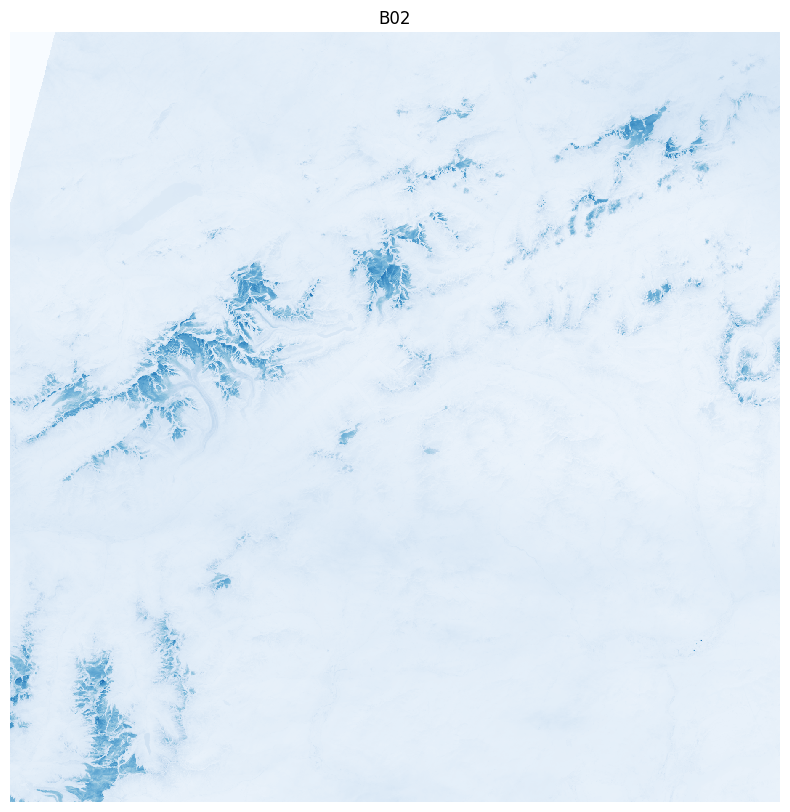

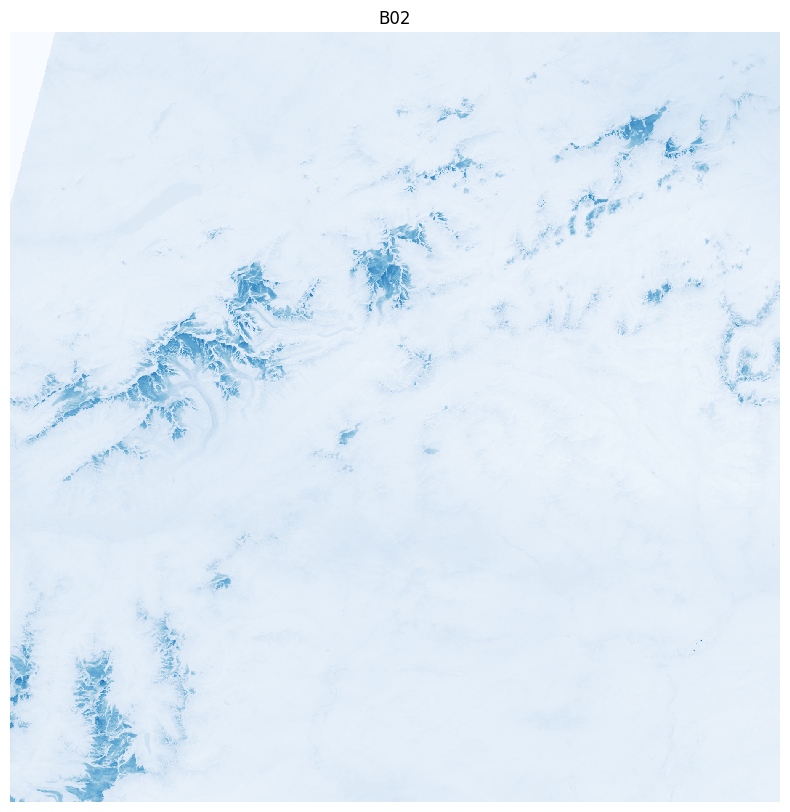

In [ ]:
from helpers import plot_band
plot_band(ref, "B02")
plot_band(mod, "B02")